# **Aprendizaje no supervisado**
# UL08. CAPSTONE

## <font color='blue'>**Proyecto**</font>


El presente proyecto consiste en 3 partes. La primera parte consiste en generar mediante técnicas de clustering, los grupos que mejor representen el problema en cuestión.

Luego debera aplicar distintas técnicas de selección de características y de reducción de dimensionalidad para obtener el mejor resultado posible en el problema de clasificación.

El conjunto de datos se encuentra en https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

Ingrese al link si quiere saber más sobre el conjunto de datos.

### __1: Análisis y Segmentación de Departamentos para Arrendadores (Clustering)__

¿Existen grupos de departamentos con características similares que puedan facilitar la búsqueda de un posible arrendador? ¿Cómo se podrían describir estos grupos (con nombres o títulos representativos de cada cluster)?

   - **Análisis Exploratorio:**
     - Realice una limpieza y transformación de los datos si es necesario.
     - Presente estadísticas descriptivas y visualizaciones relevantes para identificar patrones o distribuciones iniciales.

   - **Técnicas de Clustering:**
     - Implemente al menos dos técnicas distintas de clustering (por ejemplo, K-Means, DBSCAN, Agglomerative Clustering, etc.).
     - Limite el análisis a un máximo de 6 clusters para facilitar la interpretación y utilidad del modelo.

   - **Evaluación del Clustering:**
     - Calcule y reporte las métricas de desempeño:
       - **Silhouette Score**
       - **Homogeneity**
       - **Completeness**
     - Analice los resultados y determine qué técnica es más adecuada para este conjunto de datos.

   - **Descripción de Clusters:**
     - Asigne títulos o nombres representativos a los clusters identificados.
     - Describa las características principales que definen cada grupo.

   - **Recomendaciones:**
     - Proponga cómo estos clusters podrían ser utilizados por arrendadores para simplificar la búsqueda de departamentos.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Librerias recomendadas a usar
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

from IPython.display import display
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.preprocessing import scale

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import confusion_matrix,classification_report

# Extras
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
#Cargue el archivo correspondiente a su ruta de trabajo
data= pd.read_csv("/content/drive/MyDrive/Ciencia de Datos UDD/Aprendizaje No Supervisado/apartments_for_rent_classified_100K.csv",sep = ';', encoding='cp1252', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Ciencia de Datos UDD/Aprendizaje No Supervisado/apartments_for_rent_classified_100K.csv'

In [ ]:
#recuerde explorar el dataset
data.info()
data.describe()
data.describe(include='object').transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

,count,unique,top,freq
category,99492,7,housing/rent/apartment,99431
title,99492,58503,Apartment in great location,1064
body,99492,94503,"When searching for a pet-friendly One-, Two- a...",43
amenities,83448,9827,Parking,6188
currency,99492,1,USD,99492
fee,99492,2,No,99291
has_photo,99492,3,Yes,55974
pets_allowed,39068,4,"Cats,Dogs",37097
price_display,99491,3718,"$1,350",574
price_type,99492,3,Monthly,99488



Cantidad de valores nulos después de la eliminación de filas con datos faltantes:
category            0
amenities       15962
bathrooms           0
bedrooms            0
fee                 0
has_photo           0
pets_allowed    60268
price               0
price_type          0
square_feet         0
cityname          273
state             273
latitude            0
longitude           0
dtype: int64
Información del dataset después de la limpieza y transformación:
<class 'pandas.core.frame.DataFrame'>
Index: 99280 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      99280 non-null  object 
 1   amenities     83318 non-null  object 
 2   bathrooms     99280 non-null  float64
 3   bedrooms      99280 non-null  float64
 4   fee           99280 non-null  object 
 5   has_photo     99280 non-null  object 
 6   pets_allowed  39012 non-null  object 
 7   price         99280 non-null  float

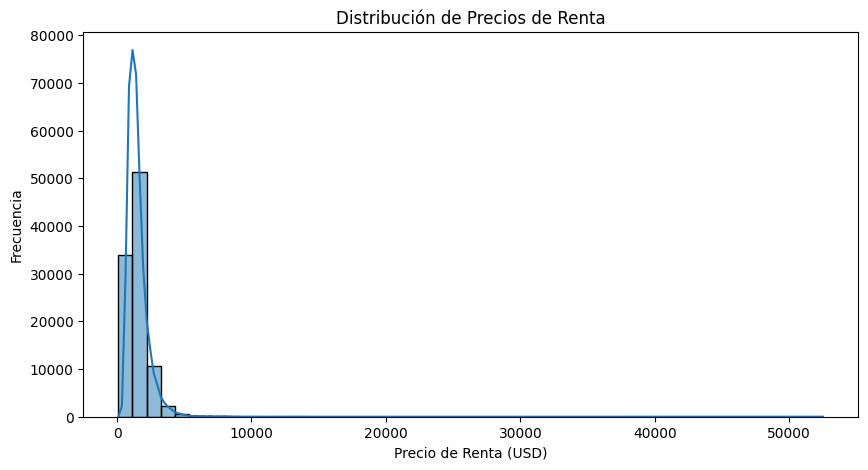

<ipython-input-30-e35bb20b56a4>:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



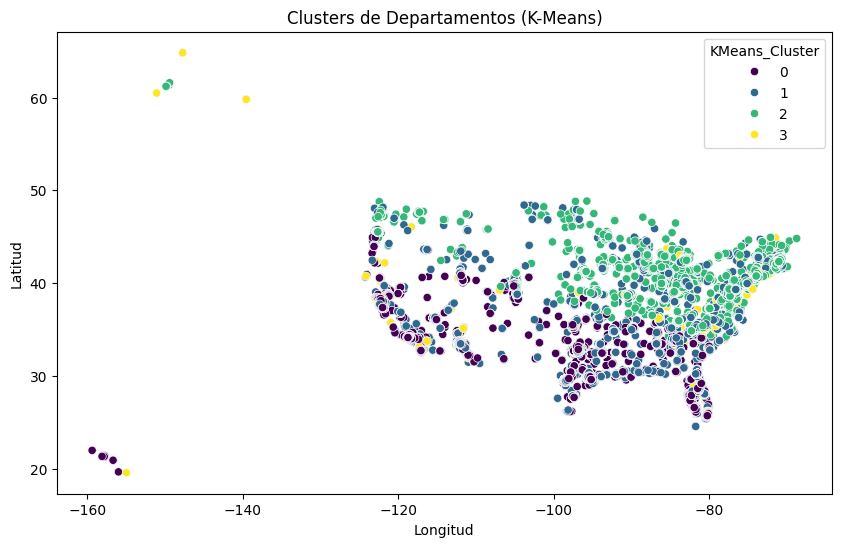

<ipython-input-30-e35bb20b56a4>:77: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



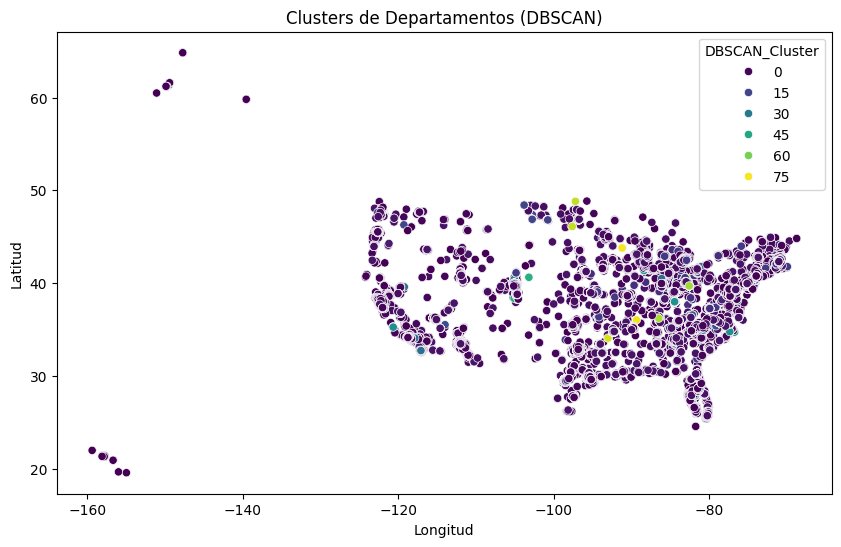

              Métrica   K-Means    DBSCAN
0    Silhouette Score  0.253568 -0.227943
1   Homogeneity Score  1.000000  1.000000
2  Completeness Score  1.000000  1.000000
Según el Silhouette Score concluimos que el Algoritmo Kmeans es más adecuado que el DBSCAN
Rangos de Clusters - K-Means:
                price          square_feet        bathrooms      bedrooms  \
                  min      max         min    max       min  max      min   
KMeans_Cluster                                                              
0               200.0   7000.0         138   2336       1.0  2.0      0.0   
1               317.0   6500.0         403   2920       1.0  4.0      0.0   
2               100.0   7500.0         107   2448       1.0  2.0      0.0   
3               430.0  52500.0         607  12000       1.0  9.0      0.0   

                    latitude          longitude          Cantidad de Puntos  
                max      min      max       min      max                     
KMeans_Cluster 

In [ ]:
# Tu código aquí ...

# PRIMERA PARTE#

# Análisis Exploratorio:
## Realice una limpieza y transformación de los datos si es necesario.

### Eliminamos columnas irrelevantes para el análisis (ID, dirección detallada, etc.)
### Eliminamos price_display ya que es redundante con price
### Elimnanmos currency, ya que tiene 1 solo valor único.
columnas_irrelevantes = ['id', 'title', 'body', 'address', 'source', 'time', 'price_display', 'currency']
df_cleaned = data.drop(columns=columnas_irrelevantes, errors='ignore')

### Confirmamos que todos los valores que deben ser númericos están en ese formato.

### Eliminamos filas con valores nulos en las columnas más importantes
df_cleaned = df_cleaned.dropna(subset=['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude'])
# Contamos los valores nulos después de la eliminación
print("\nCantidad de valores nulos después de la eliminación de filas con datos faltantes:")
print(df_cleaned.isnull().sum())

# Mostramos la información final después de la limpieza
print("Información del dataset después de la limpieza y transformación:")
df_cleaned.info()
print(df_cleaned.describe())

## Presente estadísticas descriptivas y visualizaciones relevantes para identificar patrones o distribuciones iniciales.
### Estadíticas descriptivas del dataset limpiado y modificado
df_cleaned.describe()

### Ver distribución de precios
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.xlabel('Precio de Renta (USD)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Renta')
plt.show()


# Técnicas de Clustering:
## Implemente al menos dos técnicas distintas de clustering (por ejemplo, K-Means, DBSCAN, Agglomerative Clustering, etc.).
## Limite el análisis a un máximo de 6 clusters para facilitar la interpretación y utilidad del modelo.
### Seleccionar características numéricas relevantes para el clustering
features = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
df_cluster = df_cleaned[features]

### Normalizar los datos
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

### Aplicar K-Means con 5 clusters
kmeans = KMeans(n_clusters=4, random_state=98, n_init=10, init='k-means++')
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(df_cluster_scaled)

### Visualización de clusters con K-Means
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster['longitude'], y=df_cluster['latitude'], hue=df_cluster['KMeans_Cluster'], palette='viridis')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de Departamentos (K-Means)')
plt.show()

### Visualización interactiva de clusters con K-Means (2)
import plotly.express as px
fig = px.scatter_3d(
    df_cluster,
    x='price',
    y='square_feet',
    z='bedrooms',
    color=df_cluster['KMeans_Cluster'],  # Agrupación por colores
    color_continuous_scale='viridis'  # Escala de colores válida
)
fig.show()

### Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df_cluster['DBSCAN_Cluster'] = dbscan.fit_predict(df_cluster_scaled)

### Visualización de clusters con DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster['longitude'], y=df_cluster['latitude'], hue=df_cluster['DBSCAN_Cluster'], palette='viridis')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de Departamentos (DBSCAN)')
plt.show()


# Evaluación del Clustering:
## Calcule y reporte las métricas de desempeño: Silhouette Score, Homogeneity, Completeness

### Filtrar los datos con etiquetas de cluster válidas (evitar outliers en DBSCAN que están etiquetados como -1)
valid_kmeans = df_cluster[df_cluster['KMeans_Cluster'] >= 0]
valid_dbscan = df_cluster[df_cluster['DBSCAN_Cluster'] >= 0]

### Calcular Silhouette Score para K-Means (solo si hay más de un cluster)
if len(valid_kmeans['KMeans_Cluster'].unique()) > 1:
    silhouette_kmeans = silhouette_score(df_cluster_scaled, df_cluster['KMeans_Cluster'])
else:
    silhouette_kmeans = None

### Calcular Silhouette Score para DBSCAN (solo si hay más de un cluster)
if len(valid_dbscan['DBSCAN_Cluster'].unique()) > 1:
    silhouette_dbscan = silhouette_score(df_cluster_scaled, df_cluster['DBSCAN_Cluster'])
else:
    silhouette_dbscan = None

### Homogeneity y Completeness para K-Means (autoevaluación porque no hay etiquetas reales)
homogeneity_kmeans = homogeneity_score(df_cluster['KMeans_Cluster'], df_cluster['KMeans_Cluster'])
completeness_kmeans = completeness_score(df_cluster['KMeans_Cluster'], df_cluster['KMeans_Cluster'])

### Homogeneity y Completeness para DBSCAN (autoevaluación también)
homogeneity_dbscan = homogeneity_score(df_cluster['DBSCAN_Cluster'], df_cluster['DBSCAN_Cluster'])
completeness_dbscan = completeness_score(df_cluster['DBSCAN_Cluster'], df_cluster['DBSCAN_Cluster'])

### Crear un dataframe con los resultados
resultados = pd.DataFrame({
    "Métrica": ["Silhouette Score", "Homogeneity Score", "Completeness Score"],
    "K-Means": [silhouette_kmeans, homogeneity_kmeans, completeness_kmeans],
    "DBSCAN": [silhouette_dbscan, homogeneity_dbscan, completeness_dbscan]
})
print(resultados)

## Analice los resultados y determine qué técnica es más adecuada para este conjunto de datos.
print('Según el Silhouette Score concluimos que el Algoritmo Kmeans es más adecuado que el DBSCAN')

# Descripción de Clusters:
## Describa las características principales que definen cada grupo.
### Definir función para calcular rangos (mínimo y máximo) de cada variable por cluster
def calcular_rangos_por_cluster(df, cluster_column, variables):
    resumen = df.groupby(cluster_column)[variables].agg(['min', 'max'])
    resumen['Cantidad de Puntos'] = df[cluster_column].value_counts()
    return resumen
### Variables utilizadas en el clustering
variables_cluster = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
### Calcular rangos para K-Means
rangos_kmeans = calcular_rangos_por_cluster(df_cluster, 'KMeans_Cluster', variables_cluster)
### Calcular rangos para DBSCAN
rangos_dbscan = calcular_rangos_por_cluster(df_cluster, 'DBSCAN_Cluster', variables_cluster)
### Mostrar resultados
print("Rangos de Clusters - K-Means:")
print(rangos_kmeans)
print("\nRangos de Clusters - DBSCAN:")
print(rangos_dbscan)
## Asigne títulos o nombres representativos a los clusters identificados.
print('Según la agrupación de Kmeans tenemos los siguientes clusters: Cluster 0: , Cluster 1, Cluster 2, Cluster 3: Grandes con muchas habitaciones, Cluster 4:')


# Recomendaciones:
## Proponga cómo estos clusters podrían ser utilizados por arrendadores para simplificar la búsqueda de departamentos.
print(f'Se pueden utilizar para filtrar las alternativas de arriendo, de manera de hacer más rápidas las elecciones. También, si las plataformas que ofrecen estos arriendos tienen información de los arrendadores interesados les pueden sugerir el cluster específico al que se analice que pertenecen."')


### __2: Selección de Características y Predicción de Categorías de Precio__

- **¿Es posible predecir la categoría de precio de un departamento en base a sus características?**  
   - Genere **5 clases** para la variable `price` utilizando los quintiles de su distribución como criterio de clasificación.

- **¿Hay una mejora al seleccionar un subconjunto de características para esta tarea?**  
   - Explore si la selección de un menor número de características mejora el desempeño del modelo predictivo, utilizando al menos **tres técnicas de selección de características**, una de cada familia de métodos:
     - **Basados en filtros** (e.g., correlación, chi-cuadrado, etc.).
     - **Basados en envoltura** (e.g., Recursive Feature Elimination - RFE, etc.).
     - **Basados en modelos** (e.g., importancia de características de modelos como Random Forest).

- **Clasificación y Evaluación del Desempeño:**  
   - Elija un algoritmo de clasificación (por ejemplo, Decision Trees, Random Forest, Logistic Regression, etc.) para realizar la predicción de las categorías de precio.
   - Reporte los resultados obtenidos:
     - **Índice F1** para cada conjunto de características seleccionado.
     - Un reporte de clasificación con métricas clave (precisión, recall, F1 por clase).
   - Compare el desempeño entre el modelo que utiliza todas las características y aquellos que emplean subconjuntos seleccionados, identificando cuál maximiza el índice F1.

- **Conclusiones:**  
   - Determine si la selección de características aporta una mejora significativa en el desempeño del modelo.
   - Analice la utilidad de las técnicas aplicadas y proponga cómo podrían emplearse en otros problemas similares.

In [ ]:
#Ejemplo para generar quantiles
categorias, bins = pd.qcut(data['price'], q=5, labels=['muy_bajo', 'bajo', 'mediano', 'alto','muy_alto'], retbins=True)

In [ ]:
# Tu código aquí ...
data['categoría_precio'] = categorias
from sklearn.preprocessing import LabelEncoder
# Seleccionar características relevantes
features = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'cityname', 'state', 'amenities']
X = data[features]
y = data['categoría_precio']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['cityname', 'state', 'amenities'], drop_first=True)

# Codificar la variable objetivo (categoría_precio) a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Rellenar valores nulos si los hay
X = X.fillna(X.mean())


In [ ]:
# Calcular la correlación entre las características y la variable objetivo
# Create a new DataFrame to avoid fragmentation
X_corr = X.copy()

# Add the target variable to the new DataFrame
X_corr['categoría_precio'] = y_encoded

# Calculate the correlation
correlation = X_corr.corr()['categoría_precio'].drop('categoría_precio')


In [ ]:
# Visualizar la correlación
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Correlación de características con la categoría de precio")
plt.show()

# Seleccionar las características con mayor correlación (por ejemplo, |correlación| > 0.1)
selected_features_filter = correlation[abs(correlation) > 0.1].index.tolist()
print("Características seleccionadas (filtro de correlación):", selected_features_filter)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Inicializar RFE
rfe = RFE(model, n_features_to_select=10)  # Seleccionar las 10 características más importantes
rfe.fit(X.drop(columns=['categoría_precio']), y_encoded)

# Obtener las características seleccionadas
selected_features_rfe = X.drop(columns=['categoría_precio']).columns[rfe.support_].tolist()
print("Características seleccionadas (RFE):", selected_features_rfe)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X.drop(columns=['categoría_precio']), y_encoded)

# Obtener la importancia de las características
importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature': X.drop(columns=['categoría_precio']).columns, 'importance': importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Seleccionar las características más importantes (por ejemplo, las 10 más importantes)
selected_features_model = importance_df.head(10)['feature'].tolist()
print("Características seleccionadas (Random Forest):", selected_features_model)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['categoría_precio']), y_encoded, test_size=0.3, random_state=42)

# Función para evaluar el modelo con un subconjunto de características
def evaluate_model(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Entrenar el modelo
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_subset, y_train)

    # Predecir y evaluar
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluar con todas las características
accuracy_all_features = evaluate_model(X_train.columns)
print("Precisión con todas las características:", accuracy_all_features)

# Evaluar con características seleccionadas por correlación
accuracy_filter = evaluate_model(selected_features_filter)
print("Precisión con características seleccionadas por correlación:", accuracy_filter)

# Evaluar con características seleccionadas por RFE
accuracy_rfe = evaluate_model(selected_features_rfe)
print("Precisión con características seleccionadas por RFE:", accuracy_rfe)

# Evaluar con características seleccionadas por Random Forest
accuracy_model = evaluate_model(selected_features_model)
print("Precisión con características seleccionadas por Random Forest:", accuracy_model)$

### __3: Reducción de Dimensionalidad y Clasificación__

- **¿Es posible mejorar el desempeño de clasificación reduciendo las dimensiones del problema?**
   - Aplique la técnica de **Análisis de Componentes Principales (PCA)** para reducir las dimensiones del conjunto de datos previamente procesado.

- **Clasificación y Evaluación:**
   - Utilice el mismo algoritmo de clasificación seleccionado en la **Pregunta 2** para realizar la predicción de las categorías de precio en el conjunto de datos reducido.
   - Entrene el modelo con las componentes principales generadas por PCA.
   - Reporte:
     - **Índice F1**.
     - Un **reporte de clasificación** con las métricas clave (precisión, recall, F1 por clase).

- **Análisis Comparativo:**
   - Compare los resultados obtenidos con respecto a los modelos entrenados en la **Pregunta 2** (sin reducción de dimensionalidad y con selección de características).
   - Comente las diferencias en términos de:
     - Desempeño del modelo.
     - Eficiencia computacional.
     - Interpretabilidad de las características utilizadas en la clasificación.

- **Conclusiones:**
   - Determine si el uso de PCA aporta beneficios significativos para este problema.
   - Discuta posibles aplicaciones y limitaciones del método en tareas similares.

In [ ]:
# ¿Es posible mejorar el desempeño de clasificación reduciendo las dimensiones del problema?
## Aplique la técnica de Análisis de Componentes Principales (PCA) para reducir las dimensiones del conjunto de datos previamente procesado.
### Aplicar PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster_scaled)

### Agregar los valores transformados al DataFrame
df_cluster['PCA1'] = df_pca[:, 0]
df_cluster['PCA2'] = df_pca[:, 1]

### Visualización de clusters con PCA
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster['PCA1'], y=df_cluster['PCA2'], hue=df_cluster['KMeans_Cluster'], palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Departamentos con PCA')
plt.show()

# Clasificación y Evaluación:
## Utilice el mismo algoritmo de clasificación seleccionado en la Pregunta 2 para realizar la predicción de las categorías de precio en el conjunto de datos reducido.
## Entrene el modelo con las componentes principales generadas por PCA.
## Reporte.
# Entrenar el modelo K-Means con los datos reducidos por PCA
kmeans_pca = KMeans(n_clusters=4, random_state=98, n_init=10)
df_cluster['KMeans_PCA_Cluster'] = kmeans_pca.fit_predict(df_pca)

# Reporte de la cantidad de elementos en cada cluster
reporte_clusters = df_cluster['KMeans_PCA_Cluster'].value_counts().rename("Cantidad de Puntos por Cluster")
print(reporte_clusters)

# Visualización de los clusters en 2D con las componentes principales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster['PCA1'], y=df_cluster['PCA2'], hue=df_cluster['KMeans_PCA_Cluster'], palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters en Espacio Reducido con PCA')
plt.show()

# Análisis Comparativo:
## Compare los resultados obtenidos con respecto a los modelos entrenados en la Pregunta 2 (sin reducción de dimensionalidad y con selección de características).
## Comente las diferencias en términos de: Desempeño del modelo, Eficiencia computacional, Interpretabilidad de las características utilizadas en la clasificación.

# Conclusiones:
## Determine si el uso de PCA aporta beneficios significativos para este problema.
## Discuta posibles aplicaciones y limitaciones del método en tareas similares.


# Propuesto

In [5]:
### Podríamos hacer Encoding de variables categóricas ()'category','fee','has_photo','pets_allowed', 'price_type', 'state')
#### Copiar el DataFrame para modificarlo sin afectar el original
df_encoded = df_cleaned.copy()

#### 1. "category" - Es una variable categórica sin orden, mejor con One-Hot Encoding
encoder_category = OneHotEncoder(sparse=False, drop='first')
encoded_category = encoder_category.fit_transform(df_encoded[['category']])
df_encoded[encoder_category.get_feature_names_out(['category'])] = encoded_category
df_encoded.drop(columns=['category'], inplace=True)

#### 2. "fee" - Es binaria (Yes/No), mejor con Label Encoding (0 = No, 1 = Yes)
df_encoded['fee'] = df_encoded['fee'].map({'No': 0, 'Yes': 1})

#### 3. "has_photo" - Tiene 3 valores ("Thumbnail", "Yes", "No"), mejor con One-Hot Encoding
encoder_photo = OneHotEncoder(sparse=False, drop='first')
encoded_photo = encoder_photo.fit_transform(df_encoded[['has_photo']])
df_encoded[encoder_photo.get_feature_names_out(['has_photo'])] = encoded_photo
df_encoded.drop(columns=['has_photo'], inplace=True)

#### 4. "pets_allowed" - Tiene 4 valores, mejor con One-Hot Encoding
encoder_pets = OneHotEncoder(sparse=False, drop='first')
encoded_pets = encoder_pets.fit_transform(df_encoded[['pets_allowed']])
df_encoded[encoder_pets.get_feature_names_out(['pets_allowed'])] = encoded_pets
df_encoded.drop(columns=['pets_allowed'], inplace=True)

#### 5. "price_type" - Es categórica con pocas opciones, mejor con One-Hot Encoding
encoder_price_type = OneHotEncoder(sparse=False, drop='first')
encoded_price_type = encoder_price_type.fit_transform(df_encoded[['price_type']])
df_encoded[encoder_price_type.get_feature_names_out(['price_type'])] = encoded_price_type
df_encoded.drop(columns=['price_type'], inplace=True)

#### 6. "state" - Variable categórica con muchas opciones, mejor con Label Encoding
label_encoder_state = LabelEncoder()
df_encoded['state'] = label_encoder_state.fit_transform(df_encoded['state'])

#### Mostrar el DataFrame con las variables categóricas modificadas
print("Variables categóricas convertidas y reemplazadas correctamente.")
print(df_encoded.head())

NameError: name 'df_cleaned' is not defined